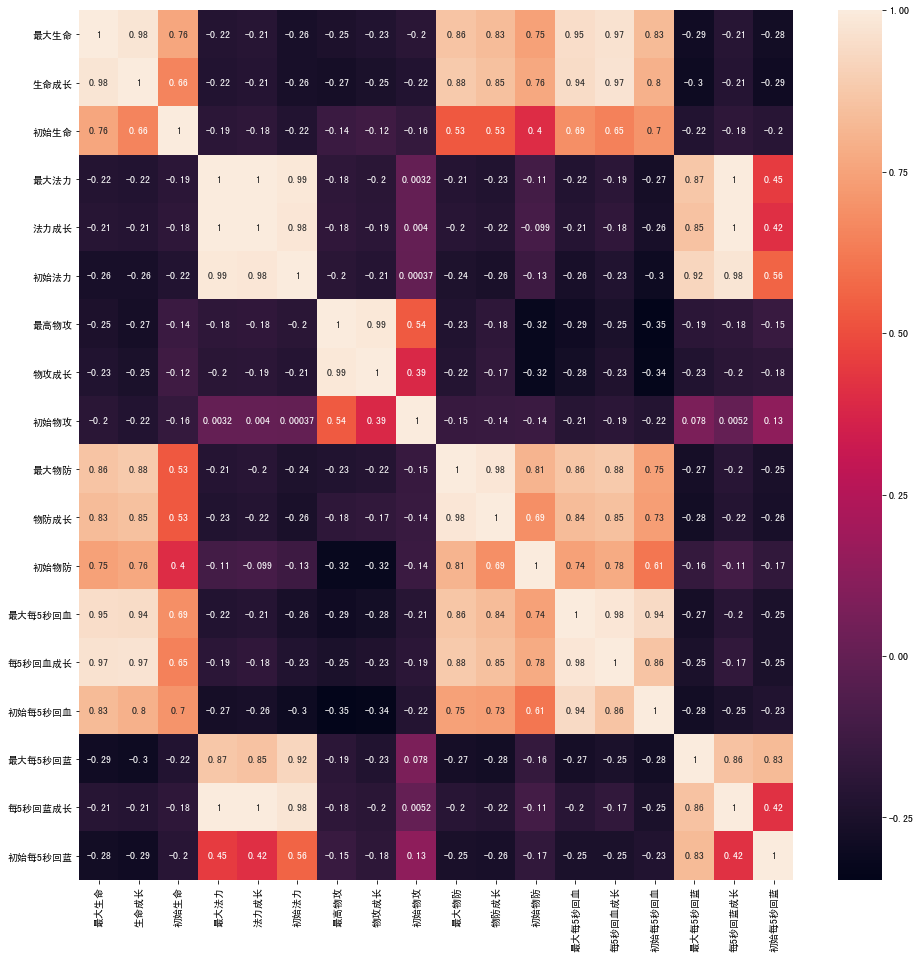

In [13]:
# -*- coding:utf-8 -*-
from sklearn.mixture import GaussianMixture
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.font_manager import FontProperties
# from matplotlib.font_manager import _rebuild
# _rebuild()

# 数据加载，避免中文乱码问题
data_ori = pd.read_csv('./data/heros.csv',encoding='gb18030')
features = ['最大生命','生命成长','初始生命','最大法力', '法力成长','初始法力','最高物攻','物攻成长','初始物攻','最大物防','物防成长','初始物防', '最大每5秒回血', '每5秒回血成长', '初始每5秒回血', '最大每5秒回蓝', '每5秒回蓝成长', '初始每5秒回蓝', '最大攻速', '攻击范围']
data = data_ori[features]

# 对英雄属性之间的关系进行可视化分析
# 设置 plt 正确显示中文
plt.rcParams['font.family']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False   # 用来正常显示负号
# 用热力图呈现 features_mean 字段之间的相关性
corr = data[features].corr()
plt.figure(figsize=(16,16))
# annot=True 显示每个方格的数据
sns.heatmap(corr,annot=True)
plt.show()

In [14]:
# 相关性大的属性保留一个，因此可以和属性进行降维
features_remain = ['最大生命', '初始生命', '最大法力', '最高物攻', '初始物攻', '最大物防', '初始物防', '最大每5秒回血', '最大每5秒回蓝', '初始每5秒回蓝', '最大攻速', '攻击范围']
data = data_ori[features_remain]
data['最大攻速']=data['最大攻速'].apply(lambda x:float(x.strip('%'))/100)
data['攻击范围']=data['攻击范围'].map({'远程':1,'近战':0})

# 采用 Z-Score 规范化数据，保证每个特征维度的数值均为 0，方差为 1
ss=StandardScaler()
data=ss.fit_transform(data)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


构造 GMM 聚类，gmm=GaussianMixture(n_components=1,covariance_type='full'，max_iter= 100)             
n_components: 即高斯混合模型的个数，也就是我们要聚类的个数，默认值为1。如果不指定 n_components，最终的聚类结果都会为同一个值。     
2. covariance_type ，代表协方差类型，一个高斯混合模型的分布，是由均值向量和协方差矩阵决定的，所以协方差的类型也代表了不同的高斯混合模型的特征，协方差有 4 种 取值：
1.  covariance_type = full，代表完全协方差，也就是元素都不为 0 。
2.  covariance_type = tied，代表相同的完全协方差
3.  covariance_type = diag，代表对角协方差，也就是对角不为 0，其余为 0.
4.  covariance_type = spherical，代表球面协方差，非对角为 0，对角完全相同，呈现球面特性。

In [15]:
gmm=GaussianMixture(n_components=30,covariance_type='full')
gmm.fit(data)

# 训练数据
prediction=gmm.predict(data)
print(prediction)

[ 2 12  8 20  0  0 11  8 10 12  4 12 20  9 21  4 23 20  0 27 16  3 27  3
  3  3 27 19 28 25  9  1  1 28 25  1 28  6 18 13  1 28 28  1  1 13 12 18
 12 28 22  5  7 17 17  2  5 12 24  0  2  7 14  2 15 29 29 26 19]


In [16]:
# 将分组结果输出到 CSV 文件中
data_ori.insert(0,'分组',prediction)
data_ori.to_csv('./save/heros_out.csv',index=False,sep=',')

from sklearn.metrics import calinski_harabaz_score
print(calinski_harabaz_score(data,prediction))

22.829265169984946
